## Importing Libraries

In [66]:
import sys
print(sys.executable)


c:\Users\Dell\Desktop\TFProject\tfvenv\Scripts\python.exe


In [67]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import sklearn
import seaborn as sns

In [68]:
import matplotlib.pyplot as plt

## DATA PREPROCESSING

## Training Set Image Pre-Processing

In [69]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


## Validation Set Image Pre-Processing

In [70]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [71]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [72]:
for (x,y) in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[135.5  120.5  125.5 ]
   [136.5  121.5  126.5 ]
   [135.75 120.75 125.75]
   ...
   [120.5  101.5  103.5 ]
   [127.5  108.5  110.5 ]
   [122.75 103.75 105.75]]

  [[129.5  114.5  119.5 ]
   [133.   118.   123.  ]
   [135.5  120.5  125.5 ]
   ...
   [119.5  100.5  102.5 ]
   [126.25 107.25 109.25]
   [126.5  107.5  109.5 ]]

  [[132.75 117.75 122.75]
   [130.25 115.25 120.25]
   [131.25 116.25 121.25]
   ...
   [119.75 100.75 102.75]
   [123.25 104.25 106.25]
   [124.   105.   107.  ]]

  ...

  [[143.   128.   135.  ]
   [141.5  126.5  133.5 ]
   [139.5  124.5  131.5 ]
   ...
   [120.25 100.25 102.25]
   [131.5  111.5  113.5 ]
   [121.75 101.75 103.75]]

  [[151.25 136.25 143.25]
   [148.5  133.5  140.5 ]
   [142.75 127.75 134.75]
   ...
   [124.25 104.25 106.25]
   [128.25 108.25 110.25]
   [130.   110.   112.  ]]

  [[144.5  129.5  136.5 ]
   [145.   130.   137.  ]
   [144.   129.   136.  ]
   ...
   [125.75 105.75 107.75]
   [125.5  105.5  107.5 ]
   [126.5  106.5  10

## To avoid Overshooting
1. Choose small learning rate default 0.001, we are taking 0.0001
2. There may be a chance of underfitting, so increase the amount of neuron
3. Add more Convolution layer to extract more feature from images there may be possibility that model unable to capture relevant feature or model is confusing due to lack of feature so add more feature

## Building Model

In [73]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D
from tensorflow.keras.layers import Flatten,Dropout
from tensorflow.keras.models import Sequential

In [74]:
model = Sequential()

## Building Convolution Layer

In [75]:
model.add(Conv2D(filters=32, kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

c:\Users\Dell\Desktop\TFProject\tfvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [76]:
model.add(Conv2D(filters=64, kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [77]:
model.add(Conv2D(filters=128, kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [78]:
model.add(Conv2D(filters=256, kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [79]:
model.add(Conv2D(filters=512, kernel_size=3,padding='same',activation='relu',))
model.add(Conv2D(filters=512, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [80]:
model.add(Dropout(0.25)) #To avoid Overfitting

In [81]:
model.add(Flatten())

In [82]:
model.add(Dense(units=2000,activation='relu'))

In [83]:
model.add(Dropout(0.4))

In [84]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

## Compiling Model

In [85]:
model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [86]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2000)           │     4,098,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │        76,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,886,262 (33.90 MB)

 Trainable params: 8,886,262 (33.90 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training 

In [87]:
#Model Training
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3172s 1s/step - accuracy: 0.4098 - loss: 2.0973 - val_accuracy: 0.8491 - val_loss: 0.4852
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2760s 1s/step - accuracy: 0.8427 - loss: 0.4983 - val_accuracy: 0.9097 - val_loss: 0.2763
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2676s 1s/step - accuracy: 0.9098 - loss: 0.2782 - val_accuracy: 0.9335 - val_loss: 0.2004
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2684s 1s/step - accuracy: 0.9395 - loss: 0.1857 - val_accuracy: 0.9555 - val_loss: 0.1379
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2684s 1s/step - accuracy: 0.9561 - loss: 0.1326 - val_accuracy: 0.9504 - val_loss: 0.1630
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2675s 1s/step - accuracy: 0.9653 - loss: 0.1045 - val_accuracy: 0.9558 - val_loss: 0.1374
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2725s 1s/step - accuracy: 0.9705 - loss: 0.0881 - val_accuracy: 0.9578 - val_loss: 0.1393
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2684s 1s/step - accuracy: 0.9763 - loss: 0.07

## Model Evaluation

In [88]:
# Model Evaluation On Training Set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 593s 270ms/step - accuracy: 0.9900 - loss: 0.0322


In [89]:
print(train_loss, train_acc)

0.02925383299589157 0.9908812642097473


In [90]:
# Model Evaluation On Validation Set
val_loss, val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 152s 276ms/step - accuracy: 0.9688 - loss: 0.1161


In [91]:
print(val_loss, val_acc)

0.12087350338697433 0.9675620198249817


## Saving Model

In [92]:
model.save("trained_model.keras")

In [93]:
training_history.history

{'accuracy': [0.6113948225975037,
  0.8667899370193481,
  0.9187566637992859,
  0.9438082575798035,
  0.9577210545539856,
  0.9675937294960022,
  0.9721601605415344,
  0.9780069589614868,
  0.9799843430519104,
  0.9830571413040161],
 'loss': [1.3172003030776978,
  0.42260071635246277,
  0.2519422471523285,
  0.1714002639055252,
  0.12769226729869843,
  0.09967532753944397,
  0.08273688703775406,
  0.06708606332540512,
  0.06362626701593399,
  0.050968535244464874],
 'val_accuracy': [0.8490780591964722,
  0.9097427725791931,
  0.9334737062454224,
  0.9554973840713501,
  0.9503756165504456,
  0.9557819366455078,
  0.9578306674957275,
  0.9626678824424744,
  0.967277467250824,
  0.9675620198249817],
 'val_loss': [0.4851846694946289,
  0.27625519037246704,
  0.20043811202049255,
  0.13793949782848358,
  0.1630139946937561,
  0.13738538324832916,
  0.13930882513523102,
  0.1377248615026474,
  0.10962188243865967,
  0.12087350338697433]}

In [94]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## Accuracy Visualization

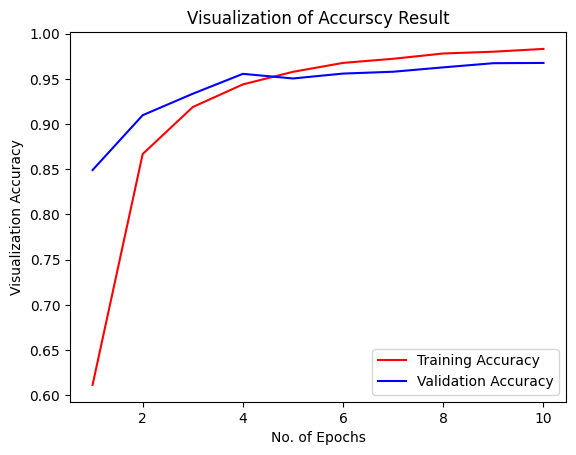

In [95]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Visualization Accuracy")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some Other Metrics for Model Evaluation

In [96]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [97]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [98]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 146s 262ms/step


(array([[1.0000000e+00, 4.6774959e-11, 6.9996968e-09, ..., 4.9209527e-15,
         9.9714688e-16, 6.3251876e-15],
        [1.0000000e+00, 4.4272287e-08, 2.5267596e-10, ..., 3.7025171e-16,
         8.1263891e-13, 7.1408808e-14],
        [1.0000000e+00, 8.1972443e-11, 1.2927458e-09, ..., 2.8625317e-19,
         3.5909033e-16, 1.1750978e-13],
        ...,
        [1.5690458e-12, 6.6655807e-16, 1.6963445e-10, ..., 3.4398424e-12,
         5.0766422e-13, 1.0000000e+00],
        [1.1646384e-11, 1.7931622e-15, 3.0598225e-11, ..., 3.7927380e-11,
         5.0520682e-13, 1.0000000e+00],
        [1.3354743e-25, 1.2444320e-27, 2.6998776e-22, ..., 7.0087378e-25,
         5.6097537e-22, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [99]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [100]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [101]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [102]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [103]:
import sklearn

In [104]:
from sklearn.metrics import classification_report,confusion_matrix

In [105]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.95      0.96       504
                                 Apple___Black_rot       0.99      1.00      0.99       497
                          Apple___Cedar_apple_rust       0.97      0.99      0.98       440
                                   Apple___healthy       0.97      0.98      0.98       502
                               Blueberry___healthy       0.97      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.94      0.91       410
                       Corn_(maize)___Common_rust_       1.00      0.97      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.95      0.

In [106]:
cm = confusion_matrix(Y_true, predicted_categories)
cm.shape

(38, 38)

### Confusion Matrix Visualization

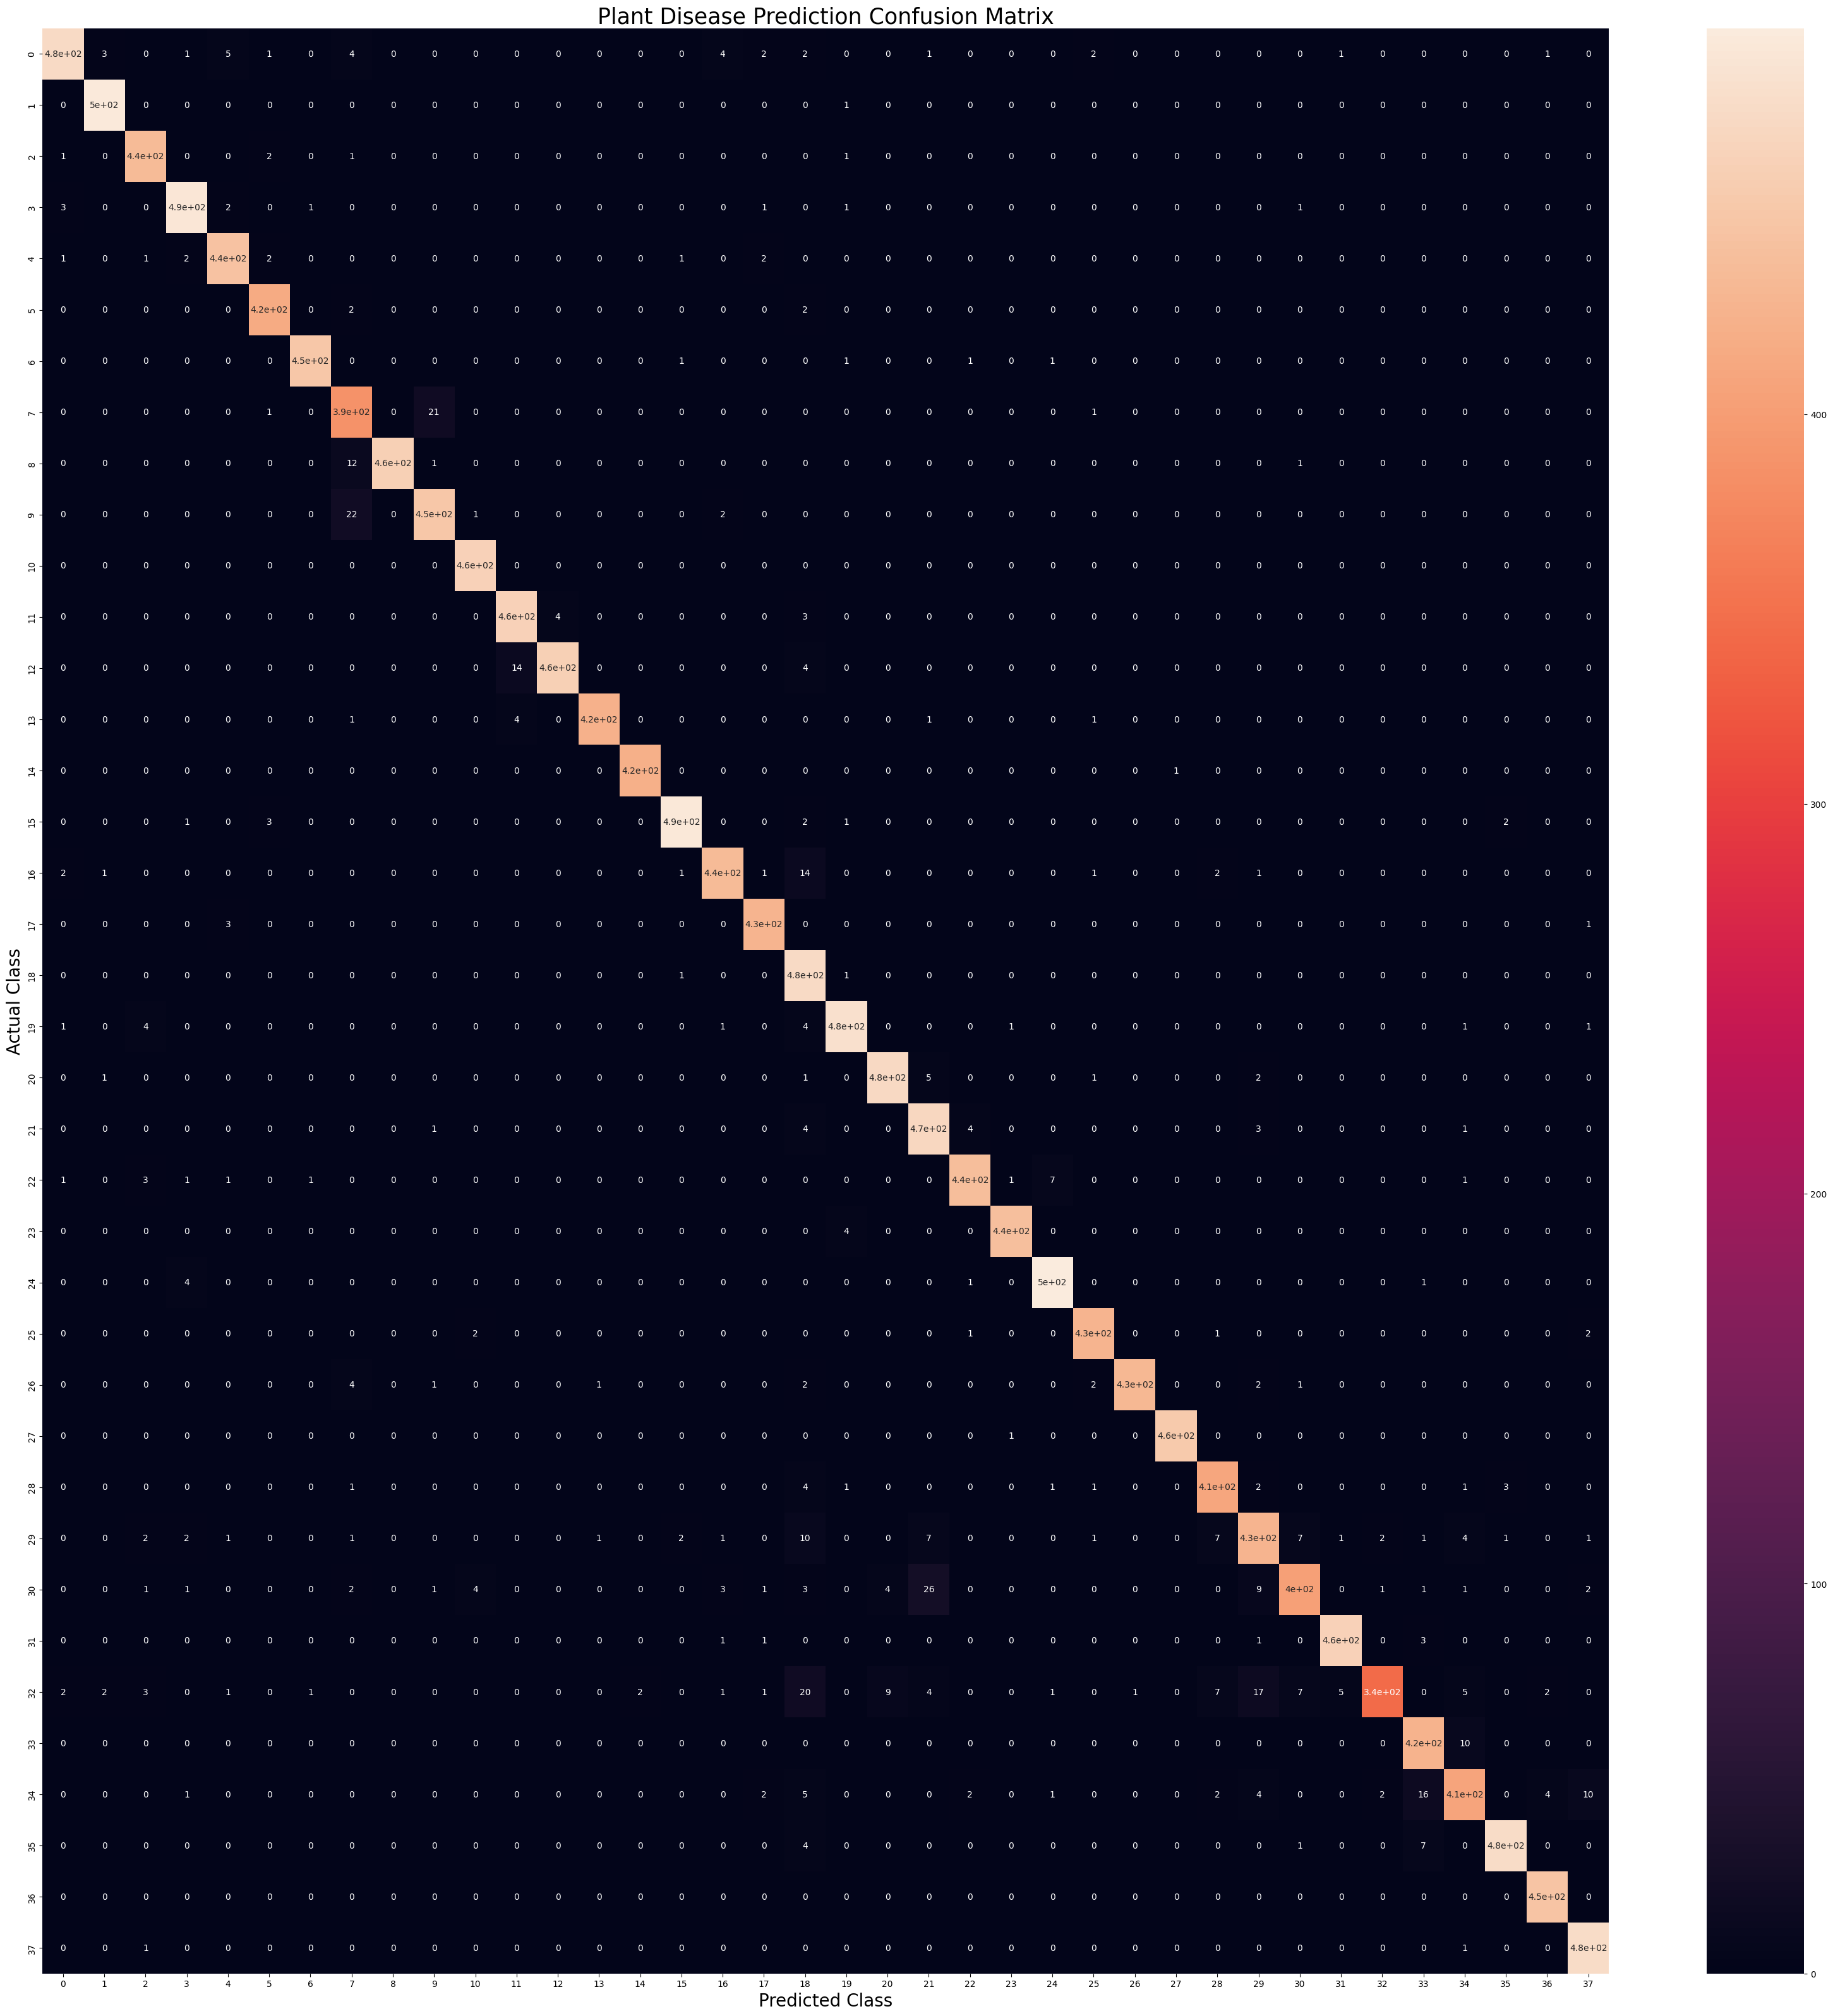

In [107]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()